# Root Locus and Stability Analysis Using Laplace Transforms

In this notebook, we will:

- Define transfer functions using Laplace Transforms
- Understand system poles and their relation to stability
- Plot root locus as a parameter (like gain \\( K \\)) varies
- Analyze how root locations affect time-domain behavior


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import control  # if not installed: pip install control
from control import tf, rlocus


## Example System: Open-Loop Transfer Function

We consider the open-loop transfer function:

\\[
G(s) = \frac{K}{s(s + 2)}
\\]

We want to analyze how the **closed-loop pole locations** change as \\( K \\) increases from 0 to ∞.


In [2]:
# Define open-loop transfer function (no feedback yet)
s = control.TransferFunction.s
K = 1  # placeholder
G = K / (s * (s + 2))


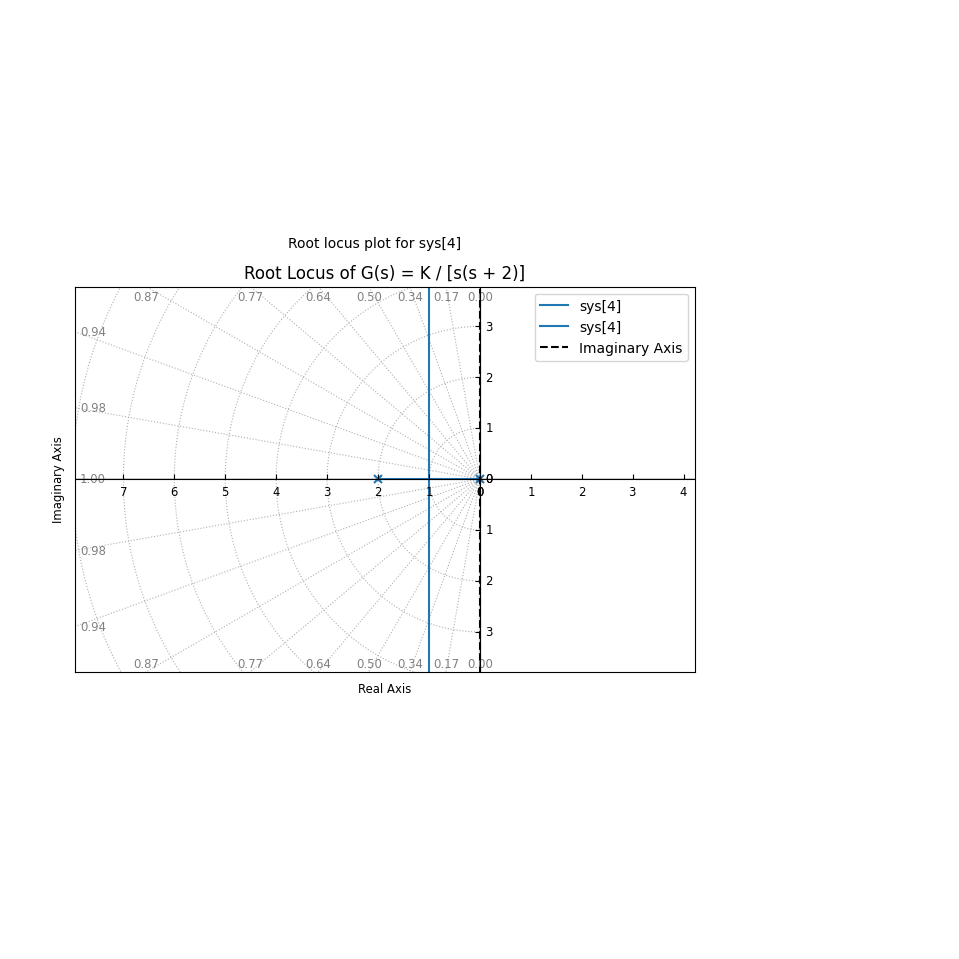

In [3]:
# Root locus plot (K varies internally from 0 to ∞)
plt.figure(figsize=(8, 5))
rlocus(G, grid=True)
plt.title('Root Locus of G(s) = K / [s(s + 2)]')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.axvline(x=0, color='k', linestyle='--', label='Imaginary Axis')
plt.legend()
plt.show()


### Interpretation

- Poles start at the open-loop pole locations: \\( s = 0 \\) and \\( s = -2 \\)
- As \\( K \\) increases, the poles move along the root locus branches
- The system is **stable** if all poles lie in the **left half of the complex plane**
- If any pole moves to the **right half**, the system becomes **unstable**


---

## Second Example: G(s) = K / [(s+1)(s+2)(s+3)]

Let’s examine a higher-order system:

\\[
G(s) = \frac{K}{(s+1)(s+2)(s+3)}
\\]


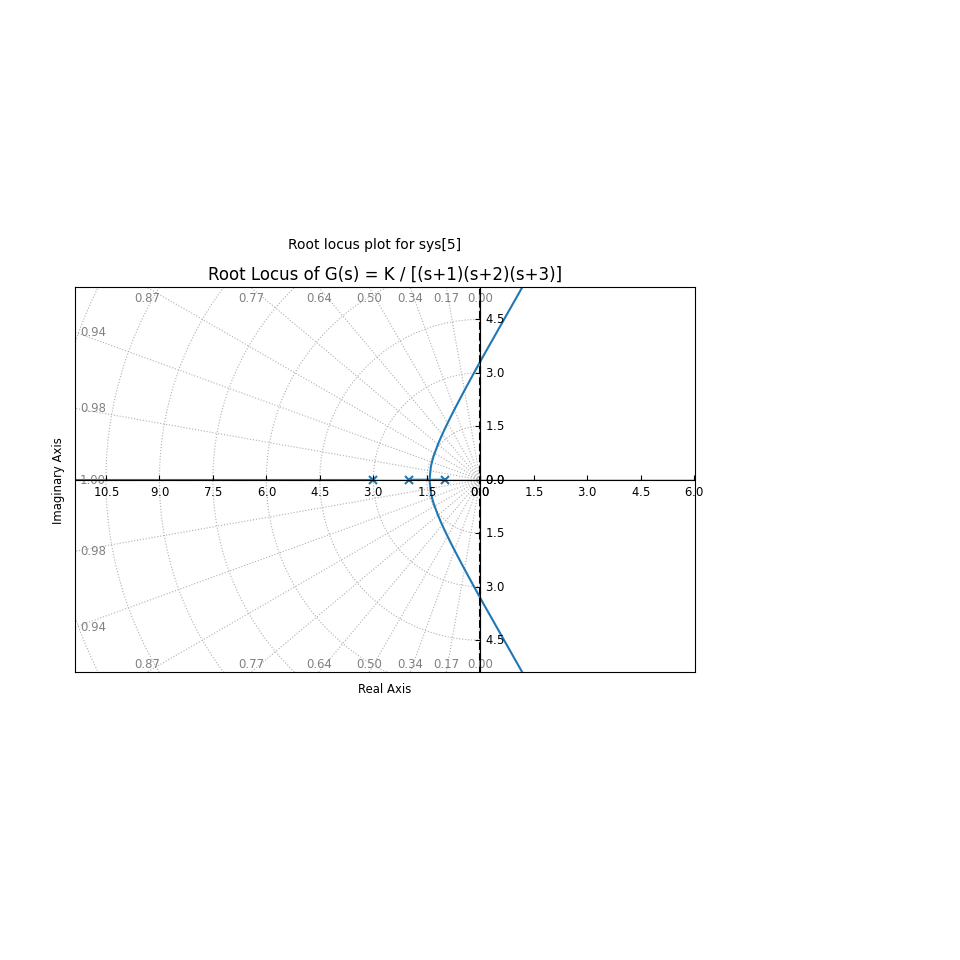

In [4]:
G2 = tf([1], [1, 6, 11, 6])
plt.figure(figsize=(8, 5))
rlocus(G2, grid=True)
plt.title('Root Locus of G(s) = K / [(s+1)(s+2)(s+3)]')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()


---

## Quiz: Root Locus and Stability

1. What happens when a pole crosses into the right-half plane?

    - A) The system becomes faster  
    - B) The system becomes unstable  
    - C) Nothing changes  
    - D) The gain becomes zero  

<details>
<summary>Click for answer</summary>
**Answer:** B) The system becomes unstable
</details>

---

2. In the root locus, the poles always start at:

    - A) Zeros of the transfer function  
    - B) Feedback points  
    - C) Open-loop poles  
    - D) Closed-loop poles  

<details>
<summary>Click for answer</summary>
**Answer:** C) Open-loop poles
</details>


---

## Interactive Root Locus: Vary Gain K

The root locus shows where the closed-loop poles move as gain \\( K \\) changes.

Use the slider below to select a value of \\( K \\) and see the resulting poles for:

\\[
G(s) = \frac{K}{s(s + 2)}
\\]

Closed-loop transfer function:

\\[
T(s) = \frac{K}{s(s + 2) + K}
\\]


In [5]:
import control
print(control.__version__)


0.10.2


# Root Locus and System Stability using Laplace Transform

In control systems, the **location of poles** in the s-plane (complex plane) tells us about the system's **stability** and **transient behavior**.  
This notebook demonstrates how the poles move as the gain \( K \) increases using:

- 🧮 **Symbolic method**: Solving characteristic equations using SymPy  
- 🔢 **Numeric method**: Using the `control` library to simulate feedback systems

---

## Key Concepts:

- **Poles in Left-Half Plane (LHP)** ⟶ Stable system
- **Poles on Imaginary Axis or Right-Half Plane (RHP)** ⟶ Marginally stable or unstable
- **Conjugate Complex Poles** ⟶ Oscillatory (underdamped) behavior
- **Real Poles only** ⟶ Overdamped system

Use the **slider** below to observe how increasing the gain \( K \) changes the pole positions.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import control
from control import tf, feedback
from ipywidgets import interact
from numpy import roots  # Use numpy to find poles directly

def show_closed_loop_poles(K=1.0):
    s = tf([1, 0], 1)
    G = K / ((s + 1)*(s + 2)*(s + 3))
    T = feedback(G)
    den_coeffs = T.den[0][0]
    poles = roots(den_coeffs)

    plt.figure(figsize=(8, 5))
    plt.axvline(x=0, color='k', linestyle='--')
    plt.scatter(np.real(poles), np.imag(poles), c='red', s=80)
    plt.title(f'Closed-loop Poles for K = {K}')
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.grid(True)
    plt.axis('equal')
    plt.show()


In [7]:
interact(show_closed_loop_poles, K=(0.1, 100.0, 0.5))

interactive(children=(FloatSlider(value=1.0, description='K', min=0.1, step=0.5), Output()), _dom_classes=('wi…

<function __main__.show_closed_loop_poles(K=1.0)>

In [8]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive_output, FloatSlider, VBox

sp.init_printing(use_latex=True)

def symbolic_poles(K_val=1.0):
    s, K = sp.symbols('s K', real=True)
    
    # Define characteristic equation
    char_eq = (s + 1)*(s + 2)*(s + 3) + K
    char_eq_sub = char_eq.subs(K, K_val)

    # Solve for poles
    poles = sp.solve(char_eq_sub, s)
    poles_num = [complex(p.evalf()) for p in poles]

    # Display symbolic poles
    print(f"Characteristic equation: 0 = {char_eq_sub}")
    for i, p in enumerate(poles):
        print(f"Pole {i+1} =", p)

    # Plot the poles
    plt.figure(figsize=(7, 5))
    plt.axvline(x=0, color='k', linestyle='--')
    plt.scatter([p.real for p in poles_num], [p.imag for p in poles_num],
                c='red', s=80, label='Poles')
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title(f'Symbolic Poles for K = {K_val}')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()


In [9]:
K_slider = FloatSlider(value=1.0, min=0.1, max=100.0, step=0.5)
out = interactive_output(symbolic_poles, {'K_val': K_slider})
display(VBox([K_slider, out]))


---

## 3-Pole System: Root Locus Analysis

We now explore a 3-pole system:

\[
G(s) = \frac{K}{(s+1)(s+2)(s+3)}
\]

We will:
- Derive the closed-loop characteristic equation
- Solve it symbolically to find pole locations
- Plot the pole locations for varying \( K \) (numerically)

This gives us both theory and visual insight into system stability.


In [10]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import control
from control import tf, feedback
from numpy import roots
from ipywidgets import interactive_output, FloatSlider, HBox, VBox

sp.init_printing(use_latex=True)

def symbolic_poles(K_val=1.0):
    s, K = sp.symbols('s K', real=True)
    char_eq = (s + 1)*(s + 2)*(s + 3) + K
    char_eq_sub = char_eq.subs(K, K_val)
    poles = sp.solve(char_eq_sub, s)
    poles_num = [complex(p.evalf()) for p in poles]

    print(f"\nSymbolic Characteristic Equation: 0 = {char_eq_sub}")
    for i, p in enumerate(poles):
        print(f"Pole {i+1} = {p}")

    plt.figure(figsize=(6, 4))
    plt.axvline(x=0, color='k', linestyle='--')
    plt.scatter([p.real for p in poles_num], [p.imag for p in poles_num],
                c='red', s=80, label='Symbolic Poles')
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title(f'Symbolic Poles (K={K_val})')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

def numeric_poles(K=1.0):
    s = tf([1, 0], 1)
    G = K / ((s + 1)*(s + 2)*(s + 3))
    T = feedback(G)

    den_coeffs = T.den[0][0]
    poles = roots(den_coeffs)

    print(f"\nNumerical Closed-loop Poles for K = {K}:")
    for i, p in enumerate(poles):
        print(f"Pole {i+1} = {p:.4f}")

    plt.figure(figsize=(6, 4))
    plt.axvline(x=0, color='k', linestyle='--')
    plt.scatter(np.real(poles), np.imag(poles), c='blue', s=80, label='Numeric Poles')
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title(f'Numerical Poles (K={K})')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()



In [11]:
# One slider controlling both symbolic and numeric simultaneously
K_slider = FloatSlider(value=1.0, min=0.1, max=100.0, step=0.5, description='Gain K')

# Connect output widgets
symbolic_out = interactive_output(symbolic_poles, {'K_val': K_slider})
numeric_out = interactive_output(numeric_poles, {'K': K_slider})

# Display slider and outputs side-by-side (or use VBox for vertical stack)
display(VBox([K_slider, HBox([symbolic_out, numeric_out])]))


In [12]:
import control
from control import tf, feedback
from numpy import roots

def show_numeric_poles(K=1.0):
    s = tf([1, 0], 1)
    G = K / ((s + 1)*(s + 2)*(s + 3))
    T = feedback(G)  # Unity feedback

    # Get closed-loop poles numerically
    den_coeffs = T.den[0][0]
    poles = roots(den_coeffs)

    plt.figure(figsize=(7, 5))
    plt.axvline(x=0, color='k', linestyle='--', label='Imaginary Axis')
    plt.scatter(np.real(poles), np.imag(poles), c='blue', s=80, label='Closed-loop Poles')
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title(f'Numerical Poles for K = {K}')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

interact(show_numeric_poles, K=(0.1, 100.0, 0.5));


interactive(children=(FloatSlider(value=1.0, description='K', min=0.1, step=0.5), Output()), _dom_classes=('wi…

In [13]:
symbolic_slider = FloatSlider(value=1.0, min=0.1, max=100.0, step=0.5)
symbolic_out = interactive_output(symbolic_poles, {'K_val': symbolic_slider})
display(VBox([symbolic_slider, symbolic_out]))


---

## Summary

- The **symbolic method** helps us understand how the characteristic equation changes with \( K \)
- The **numerical method** gives fast and clear visual feedback on stability
- Both confirm that:
    - For low \( K \), poles are all on the left half-plane (stable)
    - As \( K \) increases, poles may move toward or cross into the right half-plane (unstable)

This dual approach deepens understanding of the root locus concept.


In [14]:
import ipywidgets as widgets
from IPython.display import display, Markdown

q1 = widgets.RadioButtons(
    options=[
        'Poles in the right half-plane indicate a stable system',
        'Poles on the imaginary axis indicate a system with no damping',
        'Poles in the left half-plane indicate a stable system',
        'Real poles always lead to oscillations'
    ],
    description='Q1:',
    layout={'width': 'max-content'}
)

def check_q1(answer):
    if answer == 'Poles in the left half-plane indicate a stable system':
        display(Markdown("✅ **Correct!** Poles in the left-half plane mean exponential decay."))
    else:
        display(Markdown("❌ **Incorrect.** Try reviewing the root locus stability rules."))

out_q1 = widgets.interactive_output(check_q1, {'answer': q1})
display(Markdown("### 🧠 Quiz 1: System Stability from Poles"))
display(q1, out_q1)


### 🧠 Quiz 1: System Stability from Poles

RadioButtons(description='Q1:', layout=Layout(width='max-content'), options=('Poles in the right half-plane in…

Output()

In [15]:
q2 = widgets.RadioButtons(
    options=[
        'True', 'False'
    ],
    description='Q2:',
    layout={'width': 'max-content'}
)

def check_q2(answer):
    if answer == 'True':
        display(Markdown("✅ **Correct!** Complex conjugate poles lead to oscillatory behavior."))
    else:
        display(Markdown("❌ **Incorrect.** Try again!"))

display(Markdown("### 🧠 Quiz 2: Complex Conjugate Poles always cause oscillations (True/False)?"))
out_q2 = widgets.interactive_output(check_q2, {'answer': q2})
display(q2, out_q2)


### 🧠 Quiz 2: Complex Conjugate Poles always cause oscillations (True/False)?

RadioButtons(description='Q2:', layout=Layout(width='max-content'), options=('True', 'False'), value='True')

Output()

# 📌 Summary

- As gain \( K \) increases, poles shift and may cross into the unstable region.
- Symbolic and numeric tools both show consistent pole movement.
- Pole positions determine:
  - **Stability**
  - **Response speed**
  - **Oscillations**

Understanding pole locations is essential for:
✅ Designing stable systems  
✅ Predicting system behavior  
✅ Applying Laplace Transforms effectively in engineering

---

Feel free to experiment by adjusting the transfer function or feedback configuration!


---

## Nyquist Plot and Stability Analysis

The **Nyquist plot** shows the frequency response of an open-loop system as \( \omega \) sweeps from \( 0 \) to \( \infty \) (and sometimes \( -\infty \)).

The **Nyquist criterion** is used to determine the **closed-loop stability** of a system:

- If the open-loop system has no right-half-plane poles, the **closed-loop system is stable if the Nyquist plot does *not* encircle (–1, 0)**.
- If the open-loop system has \( P \) poles in the right-half-plane, the number of counterclockwise encirclements \( N \) around –1 must satisfy:

\[
N = P \quad \Rightarrow \quad Z = N - P = 0 \quad \text{(no RHP closed-loop poles)}
\]


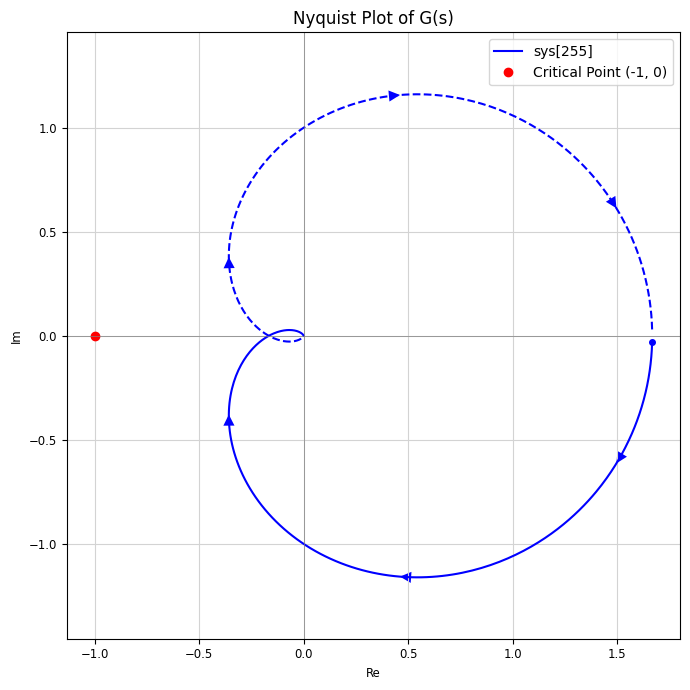

In [23]:
import control
import matplotlib.pyplot as plt

# 3-pole open-loop transfer function
s = control.tf([1, 0], 1)
G = 10 / ((s + 1)*(s + 2)*(s + 3))  # Try varying K here

# Plot Nyquist
plt.figure(figsize=(7, 7))
control.nyquist_plot(G, omega_limits=[0.01, 100], omega_num=500, color='blue', title=False)

# Add -1 point
plt.plot(-1, 0, 'ro', label='Critical Point (-1, 0)')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title('Nyquist Plot of G(s)')
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


In [28]:
import control
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, FloatSlider, VBox

def plot_nyquist(K=1.0):
    s = control.tf([1, 0], 1)
    G = K / ((s + 1)*(s + 2)*(s + 3))

    plt.figure(figsize=(7, 7))
    control.nyquist_plot(G, omega_limits=[0.01, 100], omega_num=500, color='blue', title=False)
    plt.plot(-1, 0, 'ro', label='Critical Point (-1, 0)')
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.title(f'Nyquist Plot for K = {K}')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()


In [29]:
nyquist_slider = FloatSlider(value=1.0, min=0.1, max=100.0, step=0.5, description='Gain K')
nyquist_out = interactive_output(plot_nyquist, {'K': nyquist_slider})
display(VBox([nyquist_slider, nyquist_out]))


## 📈 Nyquist Plot and Stability

The Nyquist plot is a graphical representation of a system’s frequency response.

- It helps determine **closed-loop stability** using the **Nyquist Criterion**.
- It shows how the open-loop frequency response encircles the critical point \(-1 + j0\).
- Stability can be inferred from the number of encirclements of this point, given the number of right-half-plane poles in the open-loop transfer function.

---

**Let’s test your understanding of Nyquist and stability.**


In [19]:
import ipywidgets as widgets
from IPython.display import display, Markdown

q_nyq_1 = widgets.RadioButtons(
    options=[
        "The Nyquist plot must pass through the origin for stability.",
        "Encirclements of the origin determine stability.",
        "Encirclements of the point -1 + j0 determine closed-loop stability.",
        "Nyquist plots are only valid for systems with zero poles."
    ],
    description='Q1:',
    layout={'width': 'max-content'}
)

def check_nyq_1(answer):
    if answer == "Encirclements of the point -1 + j0 determine closed-loop stability.":
        display(Markdown("✅ **Correct!** According to the Nyquist criterion, encirclement of -1 is key."))
    else:
        display(Markdown("❌ **Incorrect.** It's not about the origin—review the Nyquist criterion."))

out_nyq_1 = widgets.interactive_output(check_nyq_1, {'answer': q_nyq_1})
display(Markdown("### 🧠 Quiz 1: What determines closed-loop stability from a Nyquist plot?"))
display(q_nyq_1, out_nyq_1)


### 🧠 Quiz 1: What determines closed-loop stability from a Nyquist plot?

RadioButtons(description='Q1:', layout=Layout(width='max-content'), options=('The Nyquist plot must pass throu…

Output()

In [20]:
q_nyq_2 = widgets.RadioButtons(
    options=["True", "False"],
    description='Q2:',
    layout={'width': 'max-content'}
)

def check_nyq_2(answer):
    if answer == "True":
        display(Markdown("✅ **Correct!** Gain and phase margins are indicators of how 'robust' the system is."))
    else:
        display(Markdown("❌ **Incorrect.** They are essential for margin of safety in control design."))

display(Markdown("### 🧠 Quiz 2: True or False — A system with larger gain and phase margins is generally more robust."))
out_nyq_2 = widgets.interactive_output(check_nyq_2, {'answer': q_nyq_2})
display(q_nyq_2, out_nyq_2)


### 🧠 Quiz 2: True or False — A system with larger gain and phase margins is generally more robust.

RadioButtons(description='Q2:', layout=Layout(width='max-content'), options=('True', 'False'), value='True')

Output()

In [21]:
q_nyq_3 = widgets.RadioButtons(
    options=[
        "1 clockwise encirclement of -1 with no RHP poles = stable",
        "2 clockwise encirclements of -1 with 1 RHP pole = stable",
        "No encirclement and 0 RHP poles = unstable",
        "1 counter-clockwise encirclement of -1 with 1 RHP pole = unstable"
    ],
    description='Q3:',
    layout={'width': 'max-content'}
)

def check_nyq_3(answer):
    if answer == "1 clockwise encirclement of -1 with no RHP poles = stable":
        display(Markdown("✅ **Correct!** The number of clockwise encirclements should match the number of RHP poles for stability."))
    else:
        display(Markdown("❌ **Incorrect.** Try reviewing the rule: encirclements = -RHP open-loop poles."))

out_nyq_3 = widgets.interactive_output(check_nyq_3, {'answer': q_nyq_3})
display(Markdown("### 🧠 Quiz 3: According to the Nyquist criterion..."))
display(q_nyq_3, out_nyq_3)


### 🧠 Quiz 3: According to the Nyquist criterion...

RadioButtons(description='Q3:', layout=Layout(width='max-content'), options=('1 clockwise encirclement of -1 w…

Output()

### 📌 Key Takeaways:

- Nyquist plot helps **analyze frequency response** and **predict stability**.
- The point \(-1 + j0\) is critical: encirclements around it indicate possible instability.
- Use **gain** and **phase margins** to estimate system robustness even when stable.



---

## Final Remarks

- We explored system stability using:
  - **Pole locations (Laplace & damping)**
  - **Root Locus** (parameter variation)
  - **Nyquist plots** (frequency-domain stability)
- The Nyquist criterion is especially useful when root-locus or Bode plots are hard to interpret.
- All approaches agree in predicting **closed-loop stability**.

This concludes our Laplace Transform and control applications lesson project!
